# SIMULACIÓN | LABORATORIO 3

Integrantes:

* Claudia Arias
* Esteban Tejeda
* Andrés Gutiérrez
* Diego Rojas

### CONTENIDOS
1. Histogramas y Distribución empírica
2. Estimadores de máxima verosimilitud
3. Test de bondad de ajuste 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from IPython.display import display
import ipywidgets as widgets
from IPython.core.pylabtools import figsize
def ecdf(data):
    """ Calcula la distribución empírica acumulada"""
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)
datos = stats.binom.rvs(10,0.5,size=1000)

In [7]:
## Simularemos datos de una distribución normal y luego graficaremos su
## función de distribución empírica y la distribución teórica
mu=5
sigma=20
datos = stats.norm.rvs(loc=mu, scale=sigma, size=100)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec = []
for i in vec:
    dvec.append(stats.norm.pdf(x=i, loc=mu, scale=sigma))
ax1.plot(vec,dvec,color='red')

x,cum_norm = ecdf(datos)
axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec = []
for i in vec:
    pvec.append(stats.norm.cdf(x=i, loc=mu, scale=sigma))
ax2.plot(vec,pvec,color='red')
plt.draw()


In [8]:
## Calculemos ahora los estimadores máximo verosímiles y veamos como quedan las curvas
mu0,sigma0 = stats.norm.fit(datos)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos, edgecolor = 'black',
         bins = int(70/5))
ax1 = axs[0].twinx()
vec = range(-30,40,2)
##
dvec0 = []
for i in vec:
    dvec0.append(stats.norm.pdf(x=i, loc=mu0, scale=sigma0))
    
ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x,cum_norm)
## probabilidad teórica
ax2 = axs[1].twinx()
vec = range(-30,40,2)
##
pvec0 = []
for i in vec:
    pvec0.append(stats.norm.cdf(x=i, loc=mu0, scale=sigma0))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.draw()


In [35]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm')

KstestResult(statistic=0.6858475077096025, pvalue=2.605890497531671e-47)

In [36]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos, 'norm', args=(mu, sigma))

KstestResult(statistic=0.14302219241566538, pvalue=0.03009540060347379)

In [37]:
## Respecto de la distribución con los parámetros MV?
stats.kstest(datos, 'norm', args=(mu0, sigma0))

KstestResult(statistic=0.07151100236374197, pvalue=0.659173023470391)

In [38]:
## Comparando con una nueva muestra extraida de la distribución con los parámetros MV?
datos2 = stats.norm.rvs(loc=mu0, scale= sigma0,size=1000)
stats.kstest(datos, datos2)

KstestResult(statistic=0.081, pvalue=0.5672914310740536)

#### Ejercicio1: 
Repita el ejercicio con:

(i) una muestra de datos simulados de una v.a. discreta de su elección

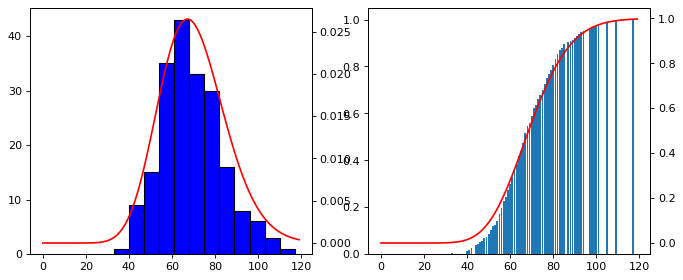

In [11]:
#Generación de datos a través de una distribución discreta
#simulación de v.a negativa binomial
p=0.3
n=30
size=200
datos_negbin =stats.nbinom.rvs(n=n, p=p, size=size) 
binwidth = 4

fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=80)

ax[0].hist(datos_negbin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
ax1 = ax[0].twinx()

largo = int(size*(3/5))
vec= list(range(largo))
#vec = list(range(n+1))

dvec = []
for i in vec:
    dvec.append(stats.nbinom.pmf(k=i, n=n, p=p))
ax1.plot(vec,dvec,color='red')

x,cum_bin = ecdf(datos_negbin)
ax[1].bar(x,cum_bin)
ax2 = ax[1].twinx()
##
pvec = []
for i in vec:
    pvec.append(stats.nbinom.cdf(k=i, n=n, p=p))
ax2.plot(vec,pvec,color='red')
plt.show()

0.30442944847531583


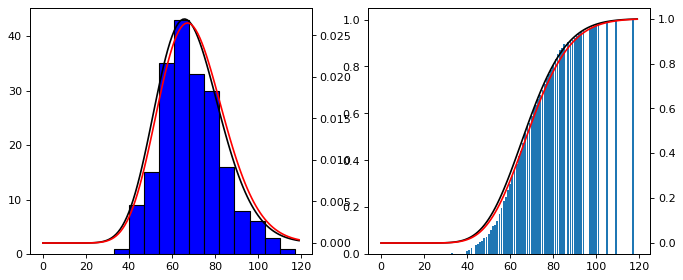

In [13]:
#Calculando los estimadores maximos verosímiles para distribución binomial

p0 = n / (n + (sum(datos_negbin)/len(datos_negbin)))
#p0 = sum(datos_negbin)/(n*len(datos_negbin))

print(p0)

binwidth = 4
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=80)
ax[0].hist(datos_negbin, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))

ax1 = ax[0].twinx()
ax[1].bar(x,cum_bin)
ax2 = ax[1].twinx()

dvec0 = []
for i in vec:
    dvec0.append(stats.nbinom.pmf(k=i, n=n, p=p0))

pvec0 = []
for i in vec:
    pvec0.append(stats.nbinom.cdf(k=i, n=n, p=p0))

ax1.plot(vec,dvec0,color='black')
ax1.plot(vec,dvec,color='red')    
    
ax2.plot(vec,pvec0,color='black')
ax2.plot(vec,pvec,color='red')
plt.show()   

In [14]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribuctgión teórica?
stats.kstest(datos_negbin, 'nbinom', args=(n,p))

KstestResult(statistic=0.0616712689756137, pvalue=0.41558847894430373)

In [15]:
## Respecto de la distribución con los parámetros MV?
stats.kstest(datos_negbin, 'nbinom', args=(n,p0))

KstestResult(statistic=0.05538019087911672, pvalue=0.5528502711115904)

(ii) una muestra de datos simulados de una v.a. continua de su elección (distinta de la normal)

### Variable Continua

* Distribución Exponencial

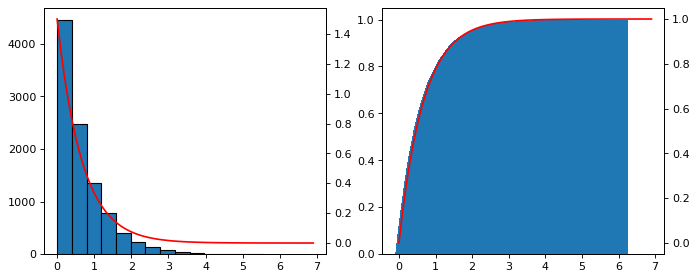

In [24]:
lamb = 1.5
size = 10000
datos_exp = stats.expon.rvs(scale = 1/lamb, size=size)

fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos_exp, edgecolor = 'black', bins = int(70/5))
ax1 = axs[0].twinx()

vec = np.arange(0,7,0.1)
dvec = []
for i in vec:
    dvec.append(stats.expon.pdf(x=i, scale=1/lamb))
ax1.plot(vec,dvec,color='red')

x, cum_exp = ecdf(datos_exp)
axs[1].bar(x+0.3, cum_exp)
## probabilidad teórica
ax2 = axs[1].twinx()
##
pvec = []
for i in vec:
    pvec.append(stats.expon.cdf(x=i, scale=1/lamb))
ax2.plot(vec,pvec,color='red')
plt.show()

* Máximo Verosimilitud

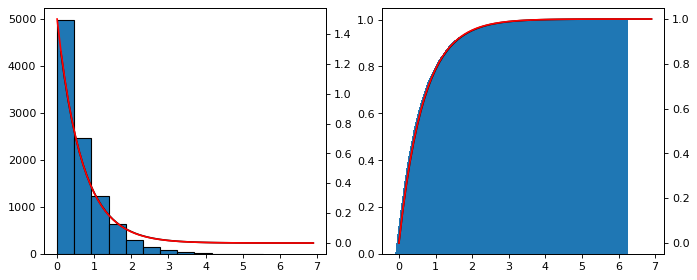

In [25]:
args = stats.expon.fit(datos_exp)
fig, axs = plt.subplots(1, 2,figsize=(10, 4), dpi=80)

axs[0].hist(datos_exp, edgecolor = 'black', bins = int(50/binwidth))
ax1 = axs[0].twinx()
dvec0 = []
for i in vec:
    dvec0.append(stats.expon.pdf(x=i, loc=args[0], scale=args[1]))
    
ax1.plot(vec[1:],dvec0[1:],color='black')
ax1.plot(vec,dvec,color='red')

axs[1].bar(x+0.3,cum_exp)
## probabilidad teórica
ax2 = axs[1].twinx()

pvec0 = []
for i in vec:
    pvec0.append(stats.expon.cdf(x=i, loc=args[0], scale=args[1]))
ax2.plot(vec,pvec0,color='black')   
ax2.plot(vec,pvec,color='red')
plt.show()

In [26]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos_exp, 'expon')

KstestResult(statistic=0.14831621150803287, pvalue=1.7674900987092905e-192)

In [27]:
## Utilicemos ahora el test de K-S para probar el ajuste de datos
## respecto de la distribución teórica?
stats.kstest(datos_exp, 'expon', args=(0, 1/lamb))

KstestResult(statistic=0.007776028515023653, pvalue=0.5782200285922756)

In [28]:
stats.kstest(datos_exp, 'expon', args=(args))

KstestResult(statistic=0.005782584961802062, pvalue=0.8897091488948361)

In [29]:
datos_exp2 = stats.expon.rvs(loc=args[0], scale=args[1] ,size=10000)
stats.kstest(datos_exp, datos_exp2)

KstestResult(statistic=0.0093, pvalue=0.7801603722233774)

## Análisis de ajustes con datos reales

#### Ejercicio 2:

(i) Interprete el resultado. ¿Qué otros modelos es razonable considerar? ¿Qué filtro en los datos podría mejorar el ajuste?

(ii) Desarrolle alguno de los análisis propuestos en (i). Comente sus resultados.

In [43]:
## Analizaremos que ocurre con datos reales
from datetime import datetime, timedelta
datos = pd.read_csv("grandesSismos.csv")
datos.head()

Fecha_local Fecha_local1 Hora_local  Latitud  Longitud  Magnitud_Ms
0  08-02-1570   08-02-1570       9:00    -36.8    -73.00          8.3
1  17-03-1575   17-03-1575      10:00    -33.4    -70.60          7.3
2  16-12-1575   16-12-1575      14:30    -39.8    -73.20          8.5
3  24-11-1604   24-11-1604      12:30    -18.5    -70.40          8.5
4  16-09-1615   16-09-1615      23:30    -18.5    -70.35          8.8

In [44]:
vec1 = datos['Fecha_local']
dtpo = []
ind = list(range(112))
for i in ind:
    fecha1 = datetime.strptime(vec1[i], '%d-%m-%Y')
    fecha2 = datetime.strptime(vec1[i+1], '%d-%m-%Y')
    num = fecha2-fecha1
    num = num/timedelta(days=1)
    dtpo.append(num)

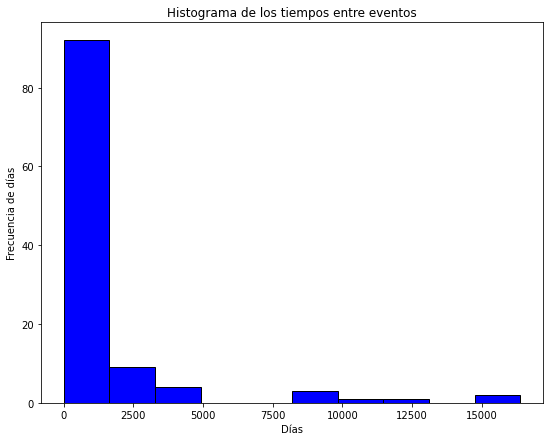

In [45]:
figsize(9, 7)

# Hacer histograma usando matplotlib, los bins deben ser enteros

plt.hist(dtpo, color = 'blue', edgecolor = 'black')

# Agrega texto
plt.title('Histograma de los tiempos entre eventos')
plt.xlabel('Días'); plt.ylabel('Frecuencia de días');

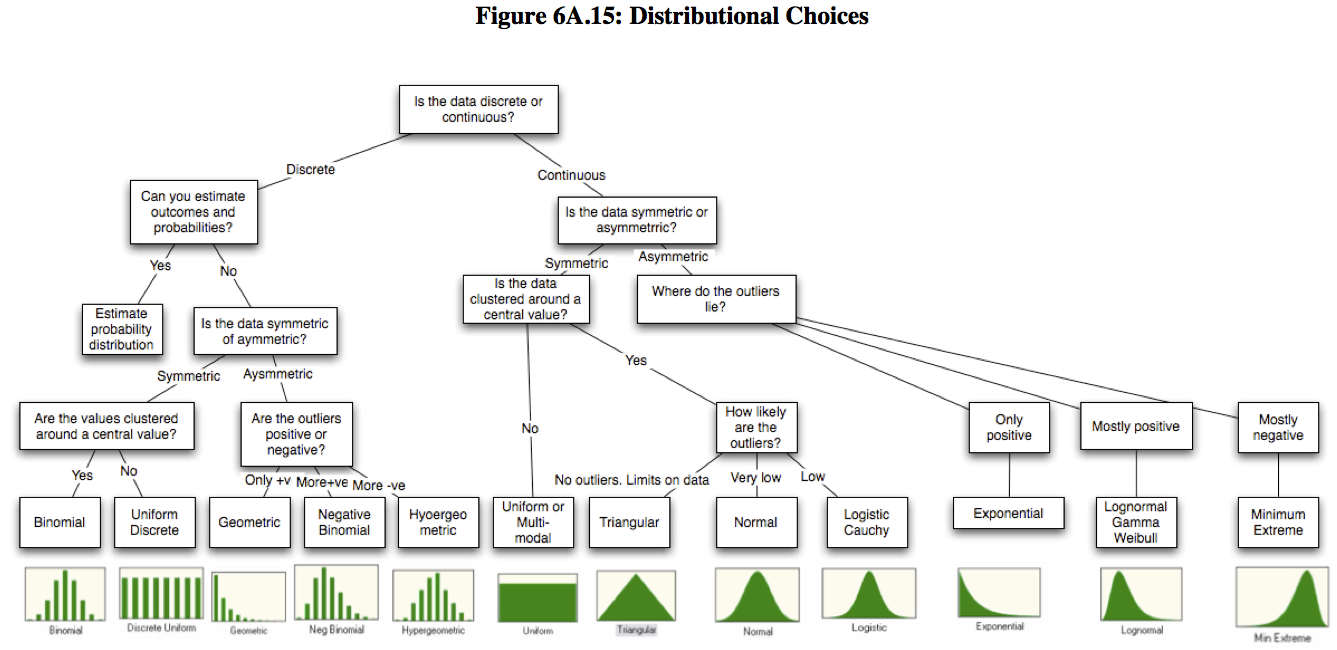

(0.0, 1457.3125)


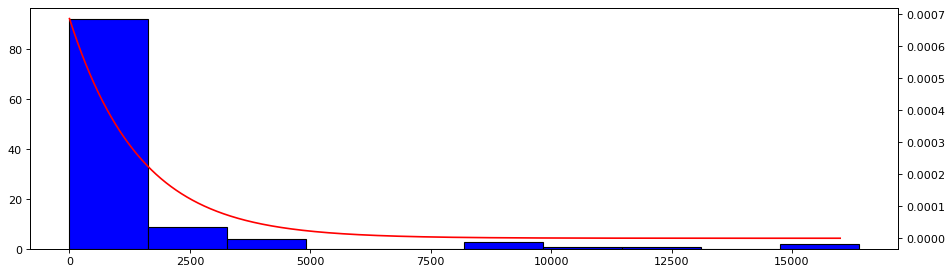

In [46]:
## ajuste de distribución exponencial considerando Estimadores de MV
fig, ax = plt.subplots(1, 1, figsize=(14, 4), dpi=80)

ax.hist(dtpo, color = 'blue', edgecolor = 'black')
ax1 = ax.twinx()

args = stats.expon.fit(dtpo)
print(args)

vec = list(range(16000))

pvec = []
for i in vec:
    pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))
ax1.plot(vec,pvec, color='red')

(0.0, 1457.3125)


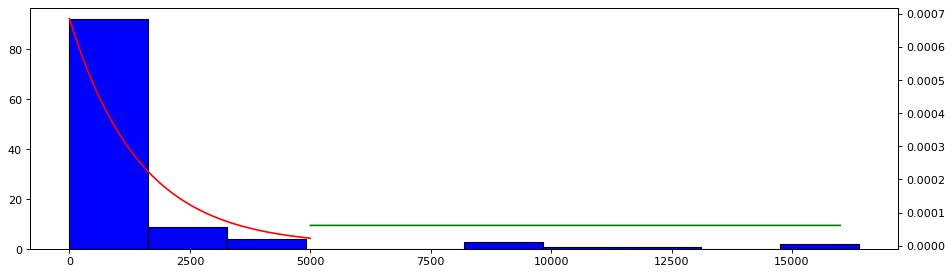

In [48]:
## ajuste de distribución exponencial considerando Estimadores de MV


fig, ax = plt.subplots(1, 1, figsize=(14, 4), dpi=80)

ax.hist(dtpo, color = 'blue', edgecolor = 'black')
ax1 = ax.twinx()

args = stats.expon.fit(dtpo)
args2= stats.uniform.fit(dtpo)
print(args)

vec = list(range(16000))
vec2= []
vec3 = []

pvec = []
pvec2 = []
for i in vec:
    if(vec[i]<5000):
        vec2.append(vec[i])
        pvec.append(stats.expon.pdf(x=i,scale=args[1],loc=args[0]))

    else:
        vec3.append(vec[i])
        pvec2.append(stats.uniform.pdf(x=i,scale=args2[1],loc=args2[0]))
        
ax1.plot(vec2,pvec, color='red')
ax1.plot(vec3,pvec2, color='green')

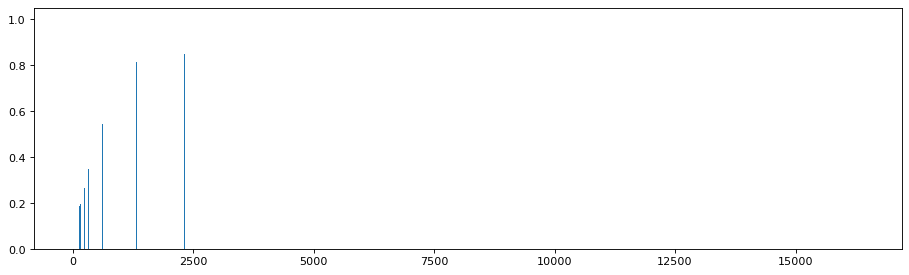

In [40]:
fig, ax0 = plt.subplots(1, 1, figsize=(14, 4), dpi=80)
x,cum_bin = ecdf(dtpo)
ax0.bar(x,cum_bin)

plt.draw()

In [41]:
display(dvec[5000:10000])

[]

In [42]:
mini = min(dvec)
maxi = max(dvec)
print("min:",mini," max:", maxi)
vec0 = list(np.linspace(mini,maxi,num=len(vec)))

min: 2.0589113209464814e-16  max: 0.026490439291805706


In [43]:
datos2 = stats.expon.rvs(*args,size=114)
stats.kstest(dtpo, datos2)

KstestResult(statistic=0.29385964912280704, pvalue=7.34414846299547e-05)

#### Ejercicio 3: 
Considere los datos analizados en la sesión anterior y estudie la posibilidad de ajustarles alguna distribución de probabilidad conocida, incluyendo estimación de parámetros por máxima verosimilitud y  el test de ajuste de k-s respectivo.

In [191]:
df = pd.read_csv('datos_sismos.csv', index_col=0)
idx=df.index
columns=df.columns
data = pd.DataFrame(data=df,index=df.index,columns=df.columns)

### Localizacion 1 =  Sector La Serena (IV Región de Coquimbo) Zona coordillerana

In [192]:
data1 = data[(data.Latitud<-30)&(data.Latitud>-33)&(data.Longitud<-69)&(data.Longitud>-71)]
data1.head()

Latitud  Longitud  Profundidad  Magnitud
Fecha (UTC)                                                  
2021-03-08 12:48:06   -32.22    -70.09          128       5.3
2021-01-19 02:46:21   -31.83    -69.03            5       6.3
2020-08-07 23:53:53   -32.97    -70.19          115       4.6
2019-12-09 05:04:14   -32.09    -70.53          130       4.9
2019-11-22 22:27:32   -32.72    -70.17          113       5.3

# Ajuste de datos con respecto a una locación 1

### Representación gráfica

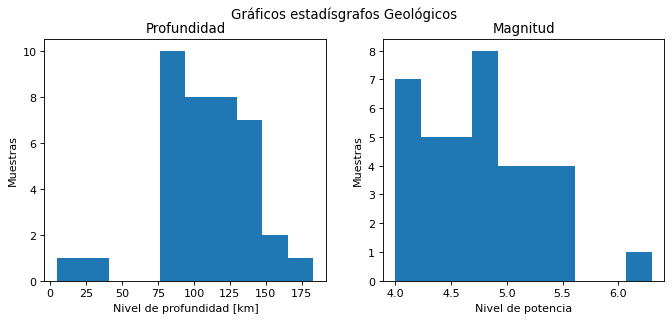

In [193]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4), dpi=80)
fig.suptitle('Gráficos estadísgrafos Geológicos') 
ax[0].hist(data1.Profundidad)
ax[0].set_title('Profundidad')
ax[0].set(xlabel='Nivel de profundidad [km]', ylabel='Muestras')

ax[1].hist(data1.Magnitud)
ax[1].set_title('Magnitud')
ax[1].set(xlabel='Nivel de potencia', ylabel='Muestras')

plt.draw()   

### Ajustando distribución estadística de la profundidad

In [246]:
#aciertos
n=19

#Cálculo máxima verosimilitud de la negativa distribución binomial para datos discretos
p0 = n / (n+(sum(data1.Profundidad)/len(data1.Profundidad)))
print(p0)

0.14932781799379524


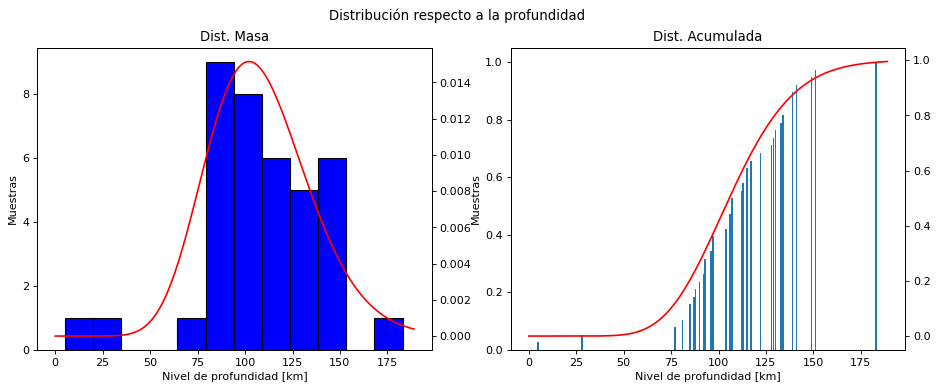

In [247]:
binwidth = 4
fig, ax = plt.subplots(1, 2, figsize=(14, 5), dpi=80)
fig.suptitle('Distribución respecto a la profundidad') 
ax[0].hist(data1.Profundidad, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
ax[0].set_title("Dist. Masa")
ax[0].set(xlabel='Nivel de profundidad [km]', ylabel='Muestras')

ax1 = ax[0].twinx()

x,cum_negbin = ecdf(data1.Profundidad)
ax[1].bar(x,cum_negbin)
ax[1].set_title("Dist. Acumulada")
ax[1].set(xlabel='Nivel de profundidad [km]', ylabel='Muestras')
ax2 = ax[1].twinx()

largo = int(len(data1.Profundidad)*5)

vec = list(range(largo))

dvec = []
for i in vec:
    dvec.append(stats.nbinom.pmf(k=i, n=n, p=p0))

pvec = []
for i in vec:
    pvec.append(stats.nbinom.cdf(k=i, n=n, p=p0))

ax1.plot(vec,dvec,color='red')    
ax2.plot(vec,pvec,color='red')
plt.draw()   

### Ajustando distribución estadística de la magnitud

In [301]:
#Cálculo máxima verosimilitud de la distribución normal para datos continuos

mu1, sigma1 = stats.norm.fit(data1.Magnitud)
print(mu1)
print(sigma1)

4.792105263157894
0.50699401997271


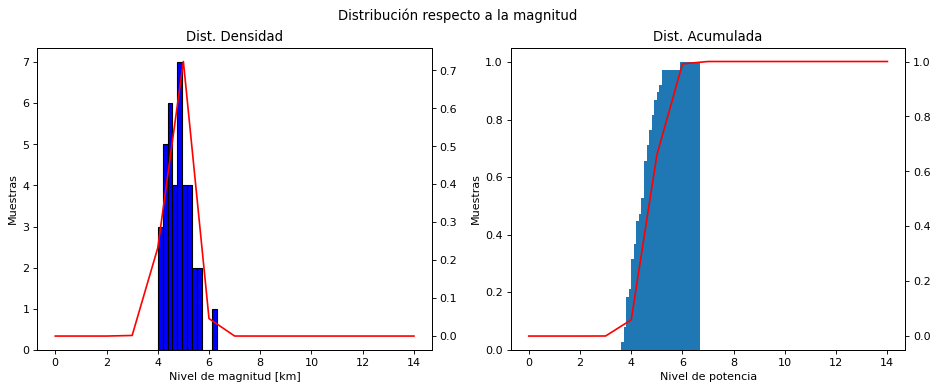

In [302]:
binwidth = 4
fig, ax = plt.subplots(1, 2, figsize=(14, 5), dpi=80)
fig.suptitle('Distribución respecto a la magnitud') 
ax[0].hist(data1.Magnitud, color = 'blue', edgecolor = 'black', bins = int(50/binwidth))
ax[0].set_title("Dist. Densidad")
ax[0].set(xlabel='Nivel de magnitud [km]', ylabel='Muestras')

ax1 = ax[0].twinx()

x,cum_bin = ecdf(data1.Magnitud)
ax[1].bar(x,cum_bin)
ax[1].set_title("Dist. Acumulada")
ax[1].set(xlabel='Nivel de potencia', ylabel='Muestras')
ax2 = ax[1].twinx()

vec = list(range(15))

dvec1 = []
for i in vec:
    dvec1.append(stats.norm.pdf(x=i, loc=mu1, scale=sigma1))

pvec1 = []
for i in vec:
    pvec1.append(stats.norm.cdf(x=i, loc=mu1, scale=sigma1))

ax1.plot(vec,dvec1,color='red')    
ax2.plot(vec,pvec1,color='red')
plt.draw() 

### Resultados

#### Profundidad

In [303]:
stats.kstest(data1.Profundidad, 'nbinom',args=(n,p0))

KstestResult(statistic=0.10069782994234755, pvalue=0.7991934973534386)

In [307]:
datos2 = stats.nbinom.rvs(n=n, p=p0, size=1000)

stats.kstest(data1.Profundidad, datos2)

KstestResult(statistic=0.10473684210526316, pvalue=0.7770554668684562)

#### Magnitud

In [308]:
stats.kstest(data1.Magnitud, 'norm',args=(mu1,sigma1))

KstestResult(statistic=0.09614434620565282, pvalue=0.8408357403809762)

In [314]:
datos3 = stats.norm.rvs(loc=mu1, scale= sigma1,size=2000)

stats.kstest(data1.Magnitud, datos3)

KstestResult(statistic=0.09836842105263158, pvalue=0.8283615412313147)

### Conclusiones

Para estos resultados, se puede atribuir el hecho de que las profundidades se concentran en datos dentro de un dominio de valores casi discretos, y al hacer el test de kolmogorov-Smirnov entrega buenos resultados tanto de aceptación como de distancia. Ésto permitiría poder hacer una familia de eventos basados en ciertas condiciones ligadas a la profundidad, cuales sean adecuadas para experimentaciones. Para estos datos, se usó una distribución binomial negativa cual nos ayuda a poder asimilar estos datos pseudodiscretos, logrando calcular su verosimilitud como hiperparámetro del modelo a contrastar, logrando una aceptación deseada de orden simulada versus el conjunto de datos ajustado.

Con respecto a los resultados de magnitud, se usó una distribución continua de tipo normal, considerando que los datos de magnitud se desempeñan dentro escalas mucho más granulares. Por ello se usa el cálculo de sus verosimilitudes a través de librerías, logrando la aceptación del test de hipótesis junto con sus distancias cuales entregan buenos resultados en que tan alejados a las distribuciones simuladas versus el conjunto de datos ajustado.